<a href="https://colab.research.google.com/github/dtoralg/intro_unsupervised/blob/main/notebooks/E2_Clustering_Jeraquico_con_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Clustering Jerárquico y Discriminación de outliers



## Introducción e información previa

Segundo ejercicio práctico, donde aplicaremos técnicas de aprendizaje no supervisado para agrupar diferentes tipos de flores del famoso dataset IRIS. Este ejercicio tiene como objetivo identificar grupos naturales en los datos, facilitando la comprensión de las relaciones y similitudes entre las muestras de flores.

### Objetivos del Ejercicio

- **Comprender los conceptos básicos del clustering jerárquico** y cómo se aplica en el contexto de análisis de datos.
- **Preprocesar los datos** del dataset IRIS para prepararlos adecuadamente para el análisis.
- **Implementar clustering jerárquico** utilizando métodos como el enlace completo, el enlace simple y el enlace promedio.
- **Visualizar los dendrogramas** para interpretar los resultados del clustering jerárquico.
- **Evaluar la calidad de los clusters** y discutir los insights obtenidos.

### Descripción del Dataset IRIS

El dataset IRIS es uno de los conjuntos de datos más conocidos y utilizados en el campo del Machine Learning y la estadística. Contiene 150 muestras de flores, cada una descrita por cuatro características métricas:

- **Sepal Length (cm):** Longitud del sépalo
- **Sepal Width (cm):** Ancho del sépalo
- **Petal Length (cm):** Longitud del pétalo
- **Petal Width (cm):** Ancho del pétalo

Además, cada muestra está etiquetada con una de las tres especies de iris:

- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**

En este ejercicio, utilizaremos las características métricas para realizar clustering jerárquico y analizaremos cómo se agrupan las muestras sin usar las etiquetas de especie durante el proceso de agrupamiento.

### Estructura del Notebook

1. **Importación de Librerías y Carga de Datos:** Preparar el entorno de trabajo e importar el dataset IRIS.
2. **Exploración de Datos:** Analizar las características principales del dataset IRIS.
3. **Preprocesamiento de Datos:** Normalizar los datos para asegurar que todas las características contribuyan equitativamente al análisis.
4. **Aplicación de Clustering Jerárquico:** Implementar varios métodos de enlace y construir dendrogramas.
5. **Visualización de Dendrogramas:** Graficar y analizar los dendrogramas resultantes para interpretar los clusters formados.
6. **Evaluación de Resultados:** Utilizar métricas de evaluación para analizar la calidad de los clusters.

### Requisitos

Para seguir este notebook, asegúrate de tener instaladas las siguientes librerías de Python:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scipy`
- `scikit-learn`

Puedes instalarlas utilizando el siguiente comando:

```bash
pip install numpy pandas matplotlib seaborn scipy scikit-learn


## LOF (Local Outlier Factor)


Este algoritmo utiliza la densidad local de puntos en un conjunto de datos para identificar anomalías. La idea básica es que, en la mayoría de los conjuntos de datos, la densidad de puntos es relativamente uniforme, y sólo unos pocos puntos tienen densidades significativamente menores o mayores que el resto. El algoritmo LOF utiliza esta propiedad para identificar los puntos que tienen una densidad significativamente menor que sus vecinos, que probablemente sean anomalías.

Para utilizar el algoritmo LOF, primero tenemos que elegir una métrica para medir la densidad de los puntos. La opción más común es la distancia k-vecino más próximo (k-NN), que mide la distancia de cada punto a sus k-vecinos más próximos. El algoritmo LOF calcula entonces la densidad local de cada punto utilizando esta métrica, e identifica como anomalías los puntos que tienen una densidad significativamente menor que sus vecinos.

Local Outlier Factor NO es un algoritmo jerárquico pero lo usaremos como base para comparar IsolatedForest, que sí lo es.

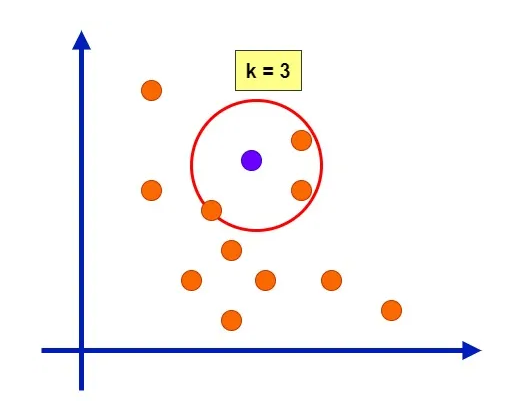


### Importación de los módulos necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

Cargamos el dataset IRIS directamente desde sklearn ya que es uno de los datasets que vienen incluidos en esta libería.

Como LOF es un modelo lineal, elegimos dos variables: *'Sepal length (cm)'* y *'Sepal width (cm)'*

Otros datasets de [Sklearn disponibles para análisis de ML](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [2]:
df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [3]:
# Definimos el modelo para un ejemplo de n_neighbors = 10
lof = LocalOutlierFactor(n_neighbors= 10)

# Ajustamos el modelo a nuestros datos
lof.fit(X)

# Calculamos el Outlier score de cada punto
scores_lof = lof.negative_outlier_factor_

In [4]:
# Añadimos los valores de outlier_score a un df junto con los valores originales
# y los ordenamos para ver el mayor outlier_score
scores_df_lof = pd.concat([X, pd.DataFrame({'outlier_score':scores_lof})], axis = 1)
scores_df_lof = scores_df_lof.sort_values(by = ['outlier_score'])
scores_df_lof.head(10)

,sepal length (cm),sepal width (cm),outlier_score
109,7.2,3.6,-2.157850
117,7.7,3.8,-1.953707
131,7.9,3.8,-1.886850
15,5.7,4.4,-1.804662
118,7.7,2.6,-1.726071
122,7.7,2.8,-1.654833
68,6.2,2.2,-1.596810
62,6.0,2.2,-1.595119
119,6.0,2.2,-1.595119
108,6.7,2.5,-1.570276


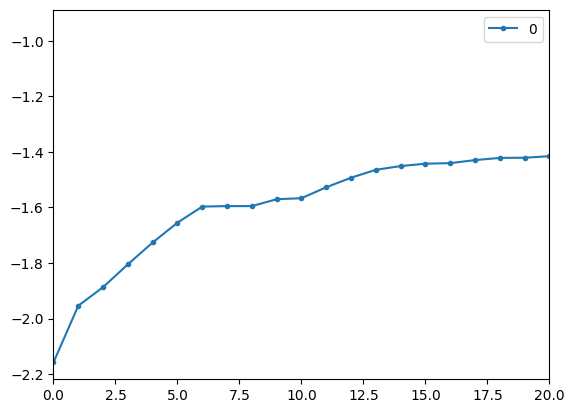

In [5]:
# Para identificar el mejor valor de k para localizar el máximo número de
# outliers podemos aplicar el método del codo
scores_sort_lof = pd.DataFrame(np.sort(scores_df_lof['outlier_score']))
scores_sort_lof.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

Usando el método del codo identificamos como outliers aquellos valores con un outlier_score menor que -1.65 (6º data point)


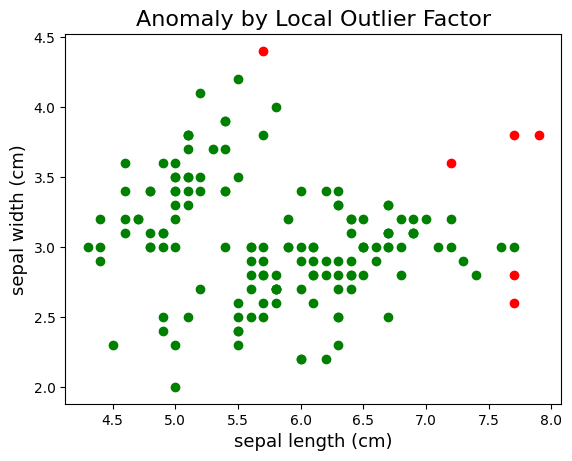

In [6]:
outliers_lof = scores_df_lof[scores_df_lof['outlier_score'] <= -1.6548326210562692]

# Ploteamos para verlo de manera gráfica
colors=['green','red']

for i in range(len(X)):
    if i not in outliers_lof['outlier_score']:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # No anómalo
    else:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # Anómalo
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomaly by Local Outlier Factor',fontsize=16)
plt.show()

## Isolation Forest

Otro algoritmo popular para la detección de anomalías es el algoritmo Isolation Forest.

Este algoritmo utiliza árboles de decisión para identificar anomalías, aislando los puntos que son difíciles de alcanzar en el árbol de decisión.

La idea básica es que, en la mayoría de los conjuntos de datos, la mayoría de los puntos pueden alcanzarse en el árbol de decisión con sólo unas pocas divisiones.

En cambio, las anomalías suelen estar aisladas del resto de los datos, por lo que es necesario realizar muchas divisiones para llegar a ellas en el árbol de decisión.

El algoritmo Isolation Forest utiliza esta propiedad para identificar anomalías aislando puntos difíciles de alcanzar en el árbol de decisión.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

Los **hiperparámetros** más importantes del algoritmo son:

- `n_estimators`: Número de árboles a entrenar. En general a mayor número de árboles más robusta es la detección de anomalias, sin embargo más pesado es el modelo y mayor tiempo computaciónal consume. Por defecto son 100.

- `contamination`: Es el porcentaje de *outliers* o anomalías que se cree que hay presentes en el dataset. Se utiliza para determinar un umbral de detección. A mayor valor, el algoritmo es más estricto a la hora de determinar que una muestra no es una anomalia. Por defecto es 0.1 y tiene que estar en el rango [0, 0.5].

In [18]:
# Definimos el modelo y elegimos el contamination level - porcentaje de outliers que estimamos,
# podemos seleccionar 'auto' si es desconocido
isoforest = IsolationForest(contamination= 0.04, random_state = 42, n_jobs = -1)

# Ajustamos el modelo a los datos
isoforest.fit(X)

# Calcuamos el outlier score de cada punto
scores_isofor = isoforest.decision_function(X)

# Calculamos si el modelo determina un punto como outlier o no en base al anomaly score
anomaly_score_isofor = isoforest.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


En el caso de las algoritmos de detección de anomalías, el *output* del método predict es un array con valores `1` o `-1`, dónde `1` indica que el valor es normal y `-1` indica la presencia de una anomalía.

In [11]:
scores_df_isofor = pd.concat([X,
                              pd.DataFrame({'outlier_score':scores_isofor}),
                              pd.DataFrame({'anomaly_score': anomaly_score_isofor})],
                              axis = 1)

scores_df_isofor = scores_df_isofor.sort_values(by = ['outlier_score'])
outliers_isofor = scores_df_isofor[scores_df_isofor['anomaly_score'] == -1]
print(outliers_isofor)
print(outliers_isofor.shape)

     sepal length (cm)  sepal width (cm)  outlier_score  anomaly_score
15                 5.7               4.4      -0.064666             -1
131                7.9               3.8      -0.051922             -1
60                 5.0               2.0      -0.042052             -1
117                7.7               3.8      -0.018557             -1
41                 4.5               2.3      -0.013804             -1
118                7.7               2.6      -0.005182             -1
(6, 4)


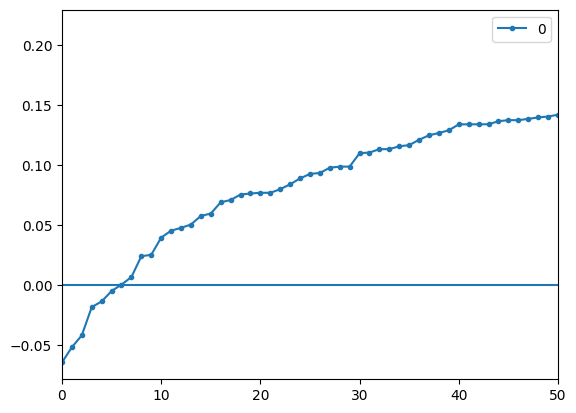

In [12]:
# Visualizamos gráficamente
scores_sort_isofor = pd.DataFrame(np.sort(scores_df_isofor['outlier_score']))
scores_sort_isofor.plot(xlim=[0, 50], style='.-').hlines(0, 0 , 50)
plt.show()

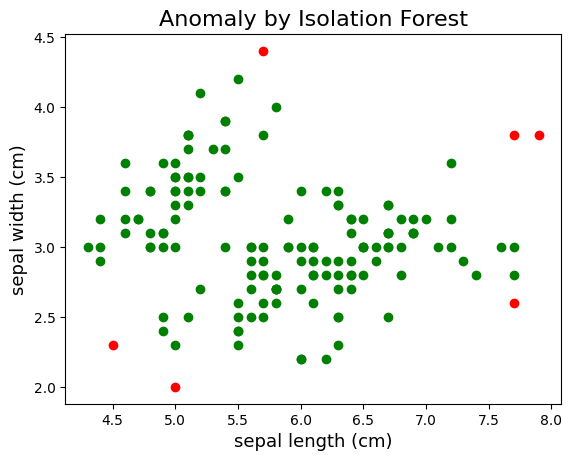

In [13]:
# Ploteamos para verlo de manera gráfica
colors=['green','red']

for i in range(len(X)):
    if i not in outliers_isofor['outlier_score']:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # No anómalo
    else:
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # Anómalo
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomaly by Isolation Forest',fontsize=16)
plt.show()

También podemos iterar probando con diferentes parámetros de contamination

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

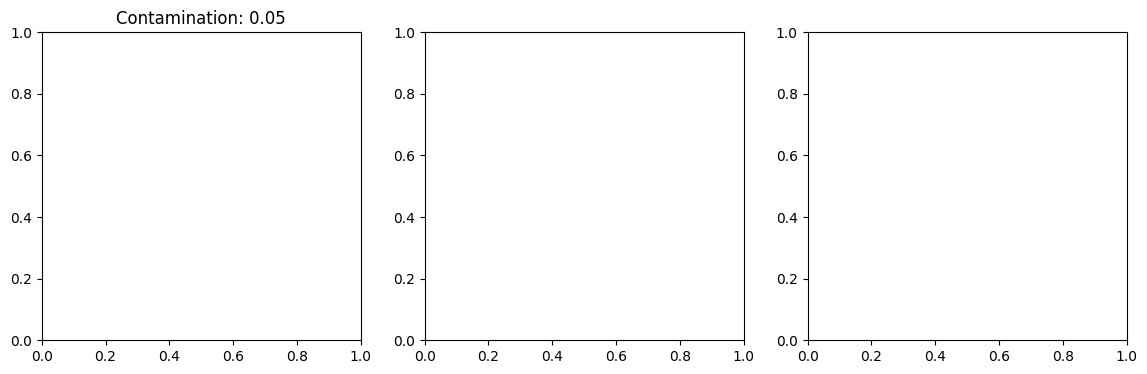

In [14]:
contaminations = (0.05, 0.1, 0.4)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for c, ax in zip(contaminations, axes):
  # Repetimos el entrenamiento para cada valor de contaminación
  forest = IsolationForest(n_estimators=100, contamination=c, random_state=1)
  forest.fit(X)
  prediction = forest.predict(X)
  ax.set_title(f"Contamination: {c}")

  # Dividimos la matriz de atributos entre observaciones regulares y outliers
  regular = X[prediction == 1]
  anomalies = X[prediction == -1]

  ax.scatter(regular[:,0], regular[:,1], label = "regular")
  ax.scatter(anomalies[:,0], anomalies[:,1], label = "anomalies")

  ax.legend()

Además de obtener la predicción determinada por el umbral elegido, podemos obtener un *score* para cada muestra, cuanto más bajo más probabilidad de que sea un *outlier*. Este *score* es independiente de `contamination`.

Este *score* es un cálculo en función de la profundidad media de una muestra en los árboles normalizado para un rango.

In [ ]:
score = isoforest.score_samples(X)

fig, ax = plt.subplots(figsize = (6,5))
scatter = plt.scatter(X[:,0], X[:,1], c=score)
plt.colorbar(scatter)
plt.show()

### Conclusión:

**LOF** prioriza que los outliers estén lejos de otros datapoints, lo cual conlleva que su distancia a los k vecinos sea mayor ->

> LOF se centra en outliers alejados de otros puntos (basado en densidad)



**IsolationForest** utiliza una seleccion de variables random, para luego generar dos ramas a partir de la media entre el máximo y el mínimo de esa variable. Genera múltiples árboles para luego hacer ensemble de los resultados

>  IsolationForest es mucho más sensible a outliers globales, y no desempeña tan bien con outliers locales



## Agglomerative Clustering

AgglomerativeClustering es un método de clustering jerárquico que construye los clusters de manera aglomerativa, es decir, comienza con cada punto como un cluster individual y los fusiona iterativamente hasta formar un solo cluster.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

In [ ]:
# Definimos nuestra funcion para generar dendrogramas

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Ploteamos el dendrograma
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# Cargamos los datos de iris (aquí usaremos el dataset completo)
iris = load_iris()
X = iris.data

In [ ]:
# distance_threshold = 0 implica que computaremos el árbol completo
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

# Ploteamos los primeros 5 niveles
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()